<a href="https://colab.research.google.com/github/mpaydar/381_GroupProject/blob/main/381_groupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
Data description “e-shop clothing 2008”

Variables:

1. YEAR (2008)

========================================================

2. MONTH -> from April (4) to August (8)

========================================================

3. DAY -> day number of the month

========================================================

4. ORDER -> sequence of clicks during one session

========================================================

5. COUNTRY -> variable indicating the country of origin of the IP address with the following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy
23-Latvia
24-Lithuania
25-Luxembourg
26-Mexico
27-Netherlands
28-Norway
29-Poland
30-Portugal
31-Romania
32-Russia
33-San Marino
34-Slovakia
35-Slovenia
36-Spain
37-Sweden
38-Switzerland
39-Ukraine
40-United Arab Emirates
41-United Kingdom
42-USA
43-biz (*.biz)
44-com (*.com)
45-int (*.int)
46-net (*.net)
47-org (*.org)

========================================================

6 . SESSION ID -> variable indicating session id (short record)

A session ID is a unique number that a Web site's server assigns a specific user for the duration of that user's visit (session). The session ID can be stored as a cookie, form field, or URL (Uniform Resource Locator). Some Web servers generate session IDs by simply incrementing static numbers.

https://www.techtarget.com/searchsoftwarequality/definition/session-ID#:~:text=A%20session%20ID%20is%20a,by%20simply%20incrementing%20static%20numbers.



========================================================

7. PAGE 1 (MAIN CATEGORY) -> concerns the main product category:
1-trousers
2-skirts
3-blouses
4-sale

========================================================

8. PAGE 2 (CLOTHING MODEL) -> contains information about the code for each product (217 products)

========================================================

9. COLOUR -> colour of product

1-beige
2-black
3-blue
4-brown
5-burgundy
6-gray
7-green
8-navy blue
9-of many colors
10-olive
11-pink
12-red
13-violet
14-white


========================================================

10. LOCATION -> photo location on the page, the screen has been divided into six parts:

1-top left
2-top in the middle
3-top right
4-bottom left
5-bottom in the middle
6-bottom right


========================================================

11. MODEL PHOTOGRAPHY -> variable with two categories: 

  1-en face
  2-profile

========================================================

12. PRICE -> price in US dollars

========================================================

13. PRICE 2 -> variable informing whether the price of a particular product is higher than 
the average price for the entire product category

  1-yes
  2-no

========================================================

14. PAGE -> page number within the e-store website (from 1 to 5)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# First, read the data into python using pandas, read csv file.
dataframe=pd.read_csv("https://raw.githubusercontent.com/mpaydar/381_GroupProject/main/GroupProject/e_shopDataset.csv")
df=pd.read_csv("https://raw.githubusercontent.com/mpaydar/381_GroupProject/main/GroupProject/e_shopDataset.csv")

# updating some of the attribute name to a better one 
dataframe.rename(columns={'page 1 (main category)': 'ProductCategory', 'page 2 (clothing model)': 'ClothingModel' , 'colour' : 'Color', 'model photography' : 'ModelPhoto'},inplace=True)     

header = ['Year','Month', 'Day' , '#ofClicks', 'Country' , 'SessionID' , 'ProductCategory' , 'Color', 'Price' , 'HigherThanAvgPrice']

# removing some of the attributes we don't need in our analysis 
# dataframe=dataframe.drop(["page 2 (clothing model)","model photography","location","page"],axis=1)   
# dataframe.columns = header
dataframe.head(30)

,year,month,day,order,country,session ID,ProductCategory,ClothingModel,Color,location,ModelPhoto,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
5,2008,4,1,6,29,1,3,C56,6,1,2,57,1,4
6,2008,4,1,7,29,1,3,C57,5,1,2,33,2,4
7,2008,4,1,8,29,1,4,P67,9,5,1,38,1,4
8,2008,4,1,9,29,1,4,P82,6,4,2,48,1,5
9,2008,4,1,1,29,2,2,B31,9,5,1,57,1,2


In [ ]:
#Identify the Data Types
df_info = pd.DataFrame(dataframe.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = dataframe.nunique()

#check missing values for each column
df_info['MissingValues']=dataframe.isnull().sum()

# Identify the count for each variable
df_info['Count']=dataframe.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(dataframe==0).sum()

# how many '?' values
df_info['?']=(dataframe=='?').sum()

df_info

,Dtype,Nunique,MissingValues,Count,ZeroValues,?
year,int64,1,0,165474,0,0
month,int64,5,0,165474,0,0
day,int64,31,0,165474,0,0
order,int64,195,0,165474,0,0
country,int64,47,0,165474,0,0
session ID,int64,24026,0,165474,0,0
ProductCategory,int64,4,0,165474,0,0
ClothingModel,object,217,0,165474,0,0
Color,int64,14,0,165474,0,0
location,int64,6,0,165474,0,0


All the data seems to be from 2008 , so there is really no use of using year as it's not giving us any information. However, from the nunique output we could see that there are several distinct days and months which could give us an insight as we dig more down into data.

In [ ]:
dataframe=dataframe.drop('year',axis=1)
dataframe.head()

,month,day,order,country,session ID,ProductCategory,ClothingModel,Color,location,ModelPhoto,price,price 2,page
0,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,4,1,5,29,1,2,B8,4,3,2,52,1,1


# Corrlation of attributes

In [ ]:
corr  = dataframe.corr()
corr

,month,day,order,country,session ID,ProductCategory,Color,location,ModelPhoto,price,price 2,page
month,1.000000,-0.075098,0.026093,0.065502,0.970961,0.017557,-0.035279,-0.017712,0.011102,0.012700,-0.014658,0.020898
day,-0.075098,1.000000,-0.021744,0.011551,0.161369,-0.001251,0.005313,0.000596,-0.000211,-0.002818,0.004254,0.011125
order,0.026093,-0.021744,1.000000,-0.064709,0.021829,0.151693,0.046427,0.014854,0.061820,-0.064779,0.000772,0.204106
country,0.065502,0.011551,-0.064709,1.000000,0.065869,0.132817,0.009789,-0.009072,0.028725,-0.045345,-0.017536,0.026695
session ID,0.970961,0.161369,0.021829,0.065869,1.000000,0.016123,-0.032034,-0.016721,0.010585,0.011669,-0.012742,0.023254
ProductCategory,0.017557,-0.001251,0.151693,0.132817,0.016123,1.000000,0.230577,0.015939,0.213113,-0.364791,-0.137944,0.347992
Color,-0.035279,0.005313,0.046427,0.009789,-0.032034,0.230577,1.000000,0.042062,0.074755,-0.091159,-0.080147,0.249322
location,-0.017712,0.000596,0.014854,-0.009072,-0.016721,0.015939,0.042062,1.000000,0.067678,-0.084653,0.073187,-0.091865
ModelPhoto,0.011102,-0.000211,0.061820,0.028725,0.010585,0.213113,0.074755,0.067678,1.000000,-0.212395,0.072944,0.258315
price,0.012700,-0.002818,-0.064779,-0.045345,0.011669,-0.364791,-0.091159,-0.084653,-0.212395,1.000000,-0.743633,-0.150455


Strongest correlation we see are the following:

session ID & Month : 0.970961

color and category : 0.230577 

session Id & day : 0.161369

order and category : 0.151693

country and category : 0.132817


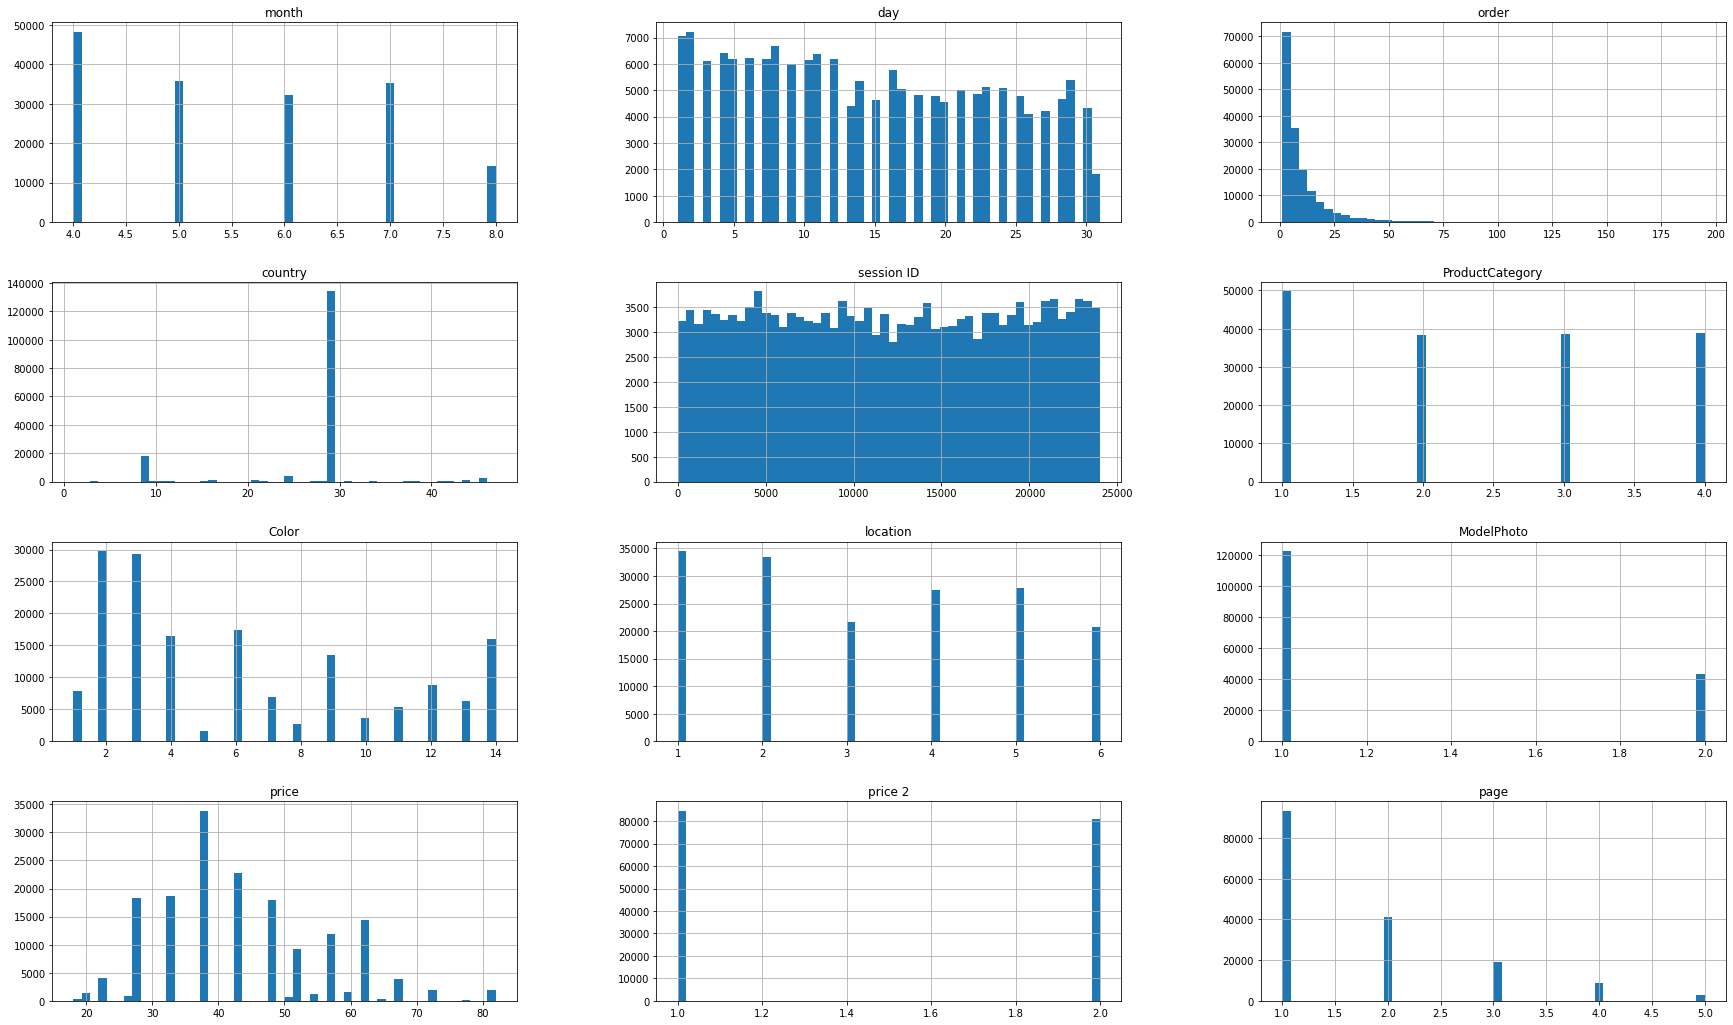

In [ ]:
dataframe.hist(bins=50,figsize=(30,18))
plt.show()

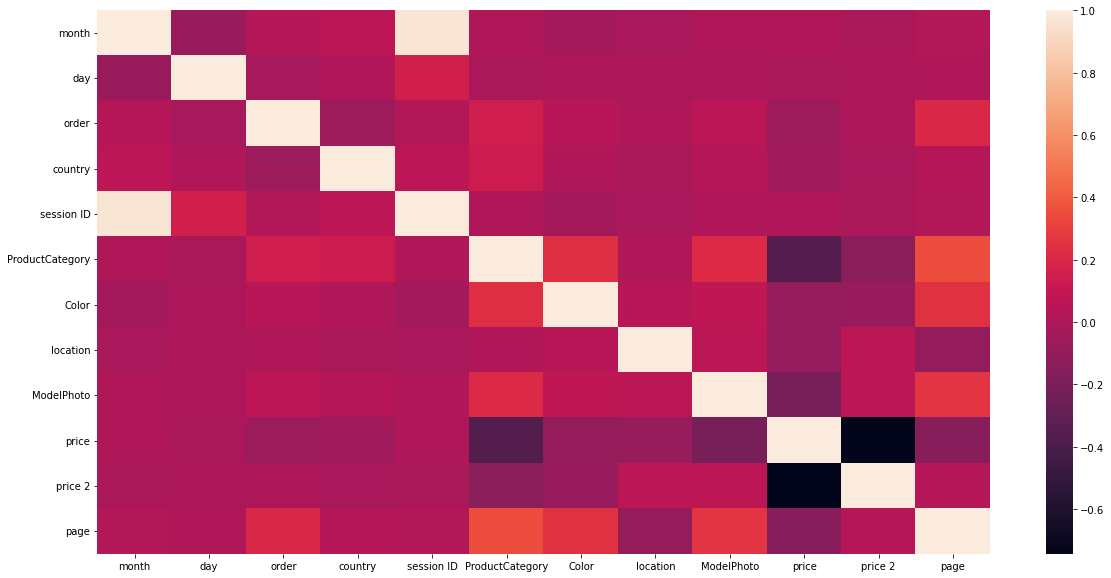

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data = corr)

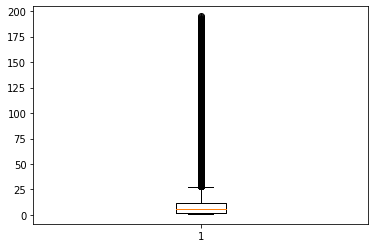

<Figure size 1440x720 with 0 Axes>

In [ ]:

plt.boxplot(dataframe['order'])
fig = plt.figure(figsize =(20, 10))
plt.show()

In [ ]:
countries=dataframe['country']
array=[]
for i in countries:
  array.append(i)
countries=pd.DataFrame(array).value_counts()
df=dataframe
df=df[df['country']<42]
x=df['country']
country_name_list=[
'Australia',
'Austria',
'Belgium',
'British Virgin Islands',
'Cayman Islands',
'Christmas Island',
'Croatia',
'Cyprus',
'Czech Republic',
'Denmark',
'Estonia',
'unidentified',
'Faroe Islands',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Iceland',
'India',
'Ireland',
'Italy',
'Latvia',
'Lithuania',
'Luxembourg',
'Mexico',
'Netherlands',
'Norway',
'Poland',
'Portugal',
'Romania',
'Russia',
'San Marino',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
"Switzerland",
"Ukraine",
"United Arab Emirates",
"United Kingdom",
'USA']


country_numbers=np.array(range(1,43))
for i in range(len(country_name_list)):
  x.replace(i+1,country_name_list[i],inplace=True)
type(x)
countries_order=pd.DataFrame(x)
target=pd.DataFrame(countries_order['country'].value_counts())
target.describe()








/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,country
count,41.000000
mean,3935.439024
std,21008.692292
min,1.000000
25%,5.000000
50%,49.000000
75%,163.000000
max,133963.000000


Looking at the statistic , it is worth to mention few facts which make some new insight about the data. 
The minimum number of clicks for a country is 1 and maximum number of clicks is 133963. 

Furthermore by considerring minimum and maximum clicks from the the above frame , we see a big standard deviation which shows the big gap among different countries. 

# Top 3 Countries Order


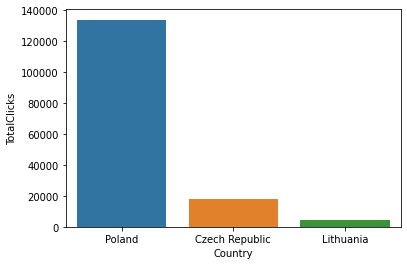

In [ ]:
Click_per_country=pd.DataFrame(countries_order.value_counts())
Top3Country=pd.DataFrame(countries_order.value_counts())
Top3Country.rename(columns={0:"TotalClicks"},inplace=True)
Top3Country=Top3Country.TotalClicks[Top3Country['TotalClicks']>834]
TotalClickList=Top3Country.to_numpy()
Top3_Names=["Poland","Czech Republic","Lithuania"]
country_click_dictionary1={}
for i in range(len(Top3_Names)):
    country_click_dictionary1[Top3_Names[i]]=TotalClickList[i]
topCountryFrame=pd.DataFrame(pd.DataFrame(country_click_dictionary1.items(), columns=['Country', 'TotalClicks']))


sns.barplot(x=topCountryFrame['Country'],y=topCountryFrame['TotalClicks'],data=topCountryFrame)

In [213]:
from numpy.core.arrayprint import array2string
# Group by session ID get the order(number of clicks)
a=dataframe.groupby('session ID')['order'].apply(list).values
# arr=[]
# arr2=[]
# for i in a:
#   element=i
#   # print(np.array(element))
#   array.append(np.array(element))
# for element_array in array:
#   for element in element_array:
#     print(element)


# array
# numpy_array=np.array(array)
# type(numpy_array)
# numpy_array=numpy_array.ravel()
# numpy_array
frameSessions=pd.DataFrame(a)
frameSessions.rename(columns={0:'Number of click per session'},inplace=True)
df_copy=dataframe
expectedColumn=df_copy['session ID']
sID=pd.DataFrame(expectedColumn)['session ID']
sID=sID.to_numpy()
sID=np.unique(sID)
expected_column=pd.DataFrame(sID)[0]
df_copy=frameSessions.join(expected_column)
df_copy.rename(columns={0:'Unique_Session'},inplace=True)
df_copy

# session=dataframe['session ID']
# session=session.to_numpy()
# session
# series1=frameSessions['Number of click per session']
# type(series1)

# type(series2)


# series1=np.array(series1)
# series1








# pd.DataFrame()



,Number of click per session,Unique_Session
0,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",1
1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]",2
2,"[1, 2, 3, 4, 5, 6]",3
3,"[1, 2, 3, 4]",4
4,[1],5
...,...,...
24021,"[1, 2, 3]",24022
24022,"[1, 2, 3, 4, 5, 6, 7]",24023
24023,[1],24024
24024,[1],24025


This tables shows the interact/number of clicks a user does per session , he has came on to the e-shop to check out different output 